In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
df2 = pd.read_excel('/DataTask.xlsx')
df2.head(100)

,Advertiser Currency,Date,Insertion Order,Line Item,App/URL,Device Type,Environment,Creative Size,City,Region,Ad Position,Position in Content,Impressions,Clicks,Media Cost (Advertiser Currency)
0,INR,2023-12-01,Affinity + Custom - MRCC - Premium Sites,Affinity - Business Professionals & Travel.,MCX LIVE by Market Pulse - Android (in.marketp...,Smart Phone,App,320x50,"Anantapur,Andhra Pradesh,India",Andhra Pradesh,ABOVE_THE_FOLD,Unknown - Out-stream,0,1,0.000000
1,INR,2023-12-01,Affinity + Custom - Platinum Card,Affinity - Fashionistas,MCX LIVE by Market Pulse - Android (in.marketp...,Smart Phone,App,320x50,Unknown,Madhya Pradesh,ABOVE_THE_FOLD,Unknown - Out-stream,0,1,0.000000
2,INR,2023-12-01,In Market + Categorical - Platinum Card Premiu...,Contextual Targeting - Brand Keywords,"PDF Reader 2020 â€“ PDF Viewer, Editor & Conve...",Smart Phone,App,300x600,Patna,Bihar,ABOVE_THE_FOLD,Pre-roll,0,1,0.000000
3,INR,2023-12-02,In Market + Categorical - MRCC,In-Market - Credit Cards,AajTak - Android (in.AajTak.headlines),Smart Phone,App,320x50,Gwalior,Madhya Pradesh,ABOVE_THE_FOLD,Unknown - Out-stream,0,1,0.000000
4,INR,2023-12-02,In Market + Categorical - MRCC - Premium Sites,Contextual Targeting - Brand Keywords,Video Player All Format - Android (video.playe...,Smart Phone,App,320x50,Unknown,Karnataka,ABOVE_THE_FOLD,Unknown - Out-stream,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,INR,2023-12-01,Affinity + Custom - MRCC,Affinity - Avid News Readers,AajTak - Android (in.AajTak.headlines),Smart Phone,App,320x50,"Bhagalpur,Bihar,India",Bihar,ABOVE_THE_FOLD,Unknown - Out-stream,1,0,0.002668
96,INR,2023-12-01,Affinity + Custom - MRCC,Affinity - Avid News Readers,AajTak - Android (in.AajTak.headlines),Smart Phone,App,320x50,"Bhiwani,Bhiwani,Haryana,India",Haryana,ABOVE_THE_FOLD,Unknown - Out-stream,1,0,0.003231
97,INR,2023-12-01,Affinity + Custom - MRCC,Affinity - Avid News Readers,AajTak - Android (in.AajTak.headlines),Smart Phone,App,320x50,"Bilimora,Gujarat,India",Gujarat,ABOVE_THE_FOLD,Unknown - Out-stream,1,0,0.002617
98,INR,2023-12-01,Affinity + Custom - MRCC,Affinity - Avid News Readers,AajTak - Android (in.AajTak.headlines),Smart Phone,App,320x50,"Budaun,Uttar Pradesh,India",Uttar Pradesh,ABOVE_THE_FOLD,Unknown - Out-stream,1,0,0.003306


In [ ]:
df2.columns

Index(['Advertiser Currency', 'Date', 'Insertion Order', 'Line Item',
       'App/URL', 'Device Type', 'Environment', 'Creative Size', 'City',
       'Region', 'Ad Position', 'Position in Content', 'Impressions', 'Clicks',
       'Media Cost (Advertiser Currency)'],
      dtype='object')

In [ ]:
df2[['Impressions', 'Clicks',
       'Media Cost (Advertiser Currency)']].head(50)

,Impressions,Clicks,Media Cost (Advertiser Currency)
0,0,1,0.000000
1,0,1,0.000000
2,0,1,0.000000
3,0,1,0.000000
4,0,1,0.000000
5,0,1,0.000000
6,0,1,0.000000
7,0,1,0.000000
8,1,0,0.002504
9,1,0,0.002867


#Q.1

> 1. What is the overall trend in Impressions, Clicks, and Media Cost over time?



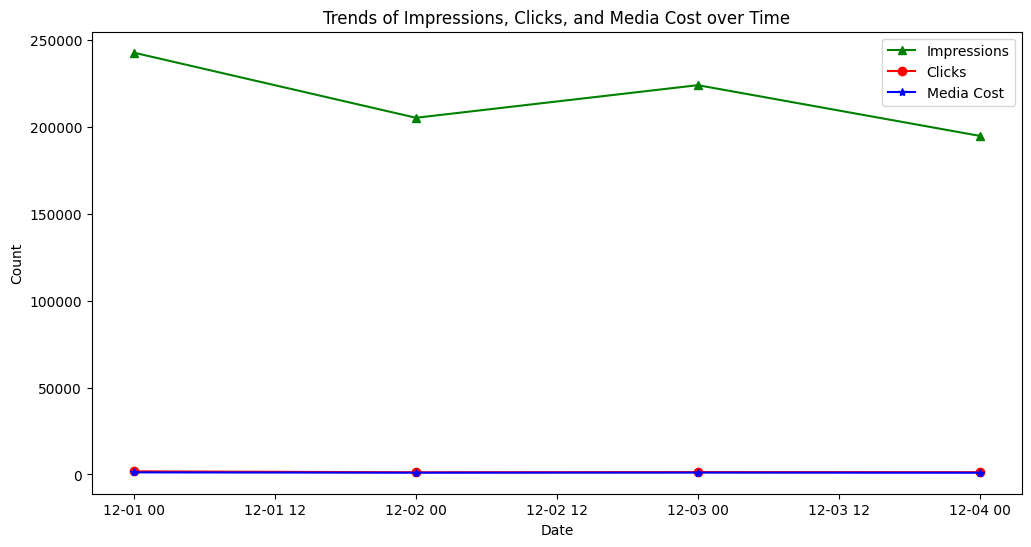

In [ ]:
# Assuming 'Date' is the column representing time
df2['Date'] = pd.to_datetime(df2['Date'])

# Group by date and calculate the sum of Impressions, Clicks, and Media Cost
grouped_data = df2.groupby('Date').agg({'Impressions': 'sum', 'Clicks': 'sum', 'Media Cost (Advertiser Currency)': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))

plt.plot(grouped_data['Date'], grouped_data['Impressions'], label='Impressions', marker='^', color='g')
plt.plot(grouped_data['Date'], grouped_data['Clicks'], label='Clicks', marker='o', color='r')
plt.plot(grouped_data['Date'], grouped_data['Media Cost (Advertiser Currency)'], label='Media Cost', marker='*', color='b')

plt.title('Trends of Impressions, Clicks, and Media Cost over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

plt.show()


#Q2

> 2. Define top performing Line items.



In [ ]:
performance = 'Clicks'

top_items = df2.sort_values(by=performance, ascending=False).head(10)
Result = top_items[['Line Item', 'Clicks']]
Result

,Line Item,Clicks
107798,In-Market - Luxury Travel & Hotels,26
107797,In-Market - Luxury Travel & Hotels,19
107796,In-Market - Gyms & Athletic Clubs,19
107791,In-Market - Luxury Travel & Hotels,17
107780,In-Market - Luxury Travel & Hotels,15
107774,Affinity - Avid Investors,14
107790,In-Market - Credit Cards,14
107779,In-Market - Credit Cards,13
107795,In-Market - Gyms & Athletic Clubs,12
107753,In-Market - Luxury Vehicles,12


#Q.3

> 3. Which is the best creative size based on the data?



In [ ]:
creative_size_counts = df2['Creative Size'].value_counts()
creative_size_counts


320x50     93071
300x250    11948
300x600     1491
320x480     1126
728x90       163
Name: Creative Size, dtype: int64

In [ ]:
best_creative_size = creative_size.idxmax()
print("The best creative size based on media cost is:", best_creative_size)


The best creative size based on media cost is: 320x50


#Q.4

> 4. Which positions in content drived has more clicks?



In [150]:
#calculate the total clicks for each position
position_clicks = df2.groupby('Position in Content')['Clicks'].sum()
position_clicks


Position in Content
In-Article               116
In-Feed                    9
Interstitial              64
Pre-roll                  14
Unknown - Out-stream    5579
Name: Clicks, dtype: int64

In [153]:
More_clicks = df2.groupby('Position in Content')['Clicks'].sum().idxmax()
print(More_clicks, ":" , position_clicks.max())

Unknown - Out-stream : 5579


#Q.5

> 5. Define three top locations?



In [ ]:

#calculate the total clicks for each city
city_clicks = df2.groupby('City')['Clicks'].sum()
top_loc = city_clicks.nlargest(3)
top_loc


City
Unknown      2986
Ahmedabad     212
Indore        195
Name: Clicks, dtype: int64


#Q.6
> 6. Based on the data analysis, are there any areas to improve performance?



In [ ]:
Improve_performance = 'Clicks'

areas = df2.sort_values(by=Improve_performance, ascending=True).head(10)
Result = areas[['Region', 'Clicks']]
Result

,Region,Clicks
53899,Maharashtra,0
69604,Gujarat,0
69603,Rajasthan,0
69602,Uttar Pradesh,0
69601,West Bengal,0
69600,Maharashtra,0
69599,Tamil Nadu,0
69598,Tamil Nadu,0
69597,Kerala,0
69596,Karnataka,0
